# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Logística: Lección 5 - Decision Tree**
---

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y evaluación
# ======================
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas.    

Los objetivos de este pair programming :   
- Ajustad un modelo de Decision Tree a nuestros datos.   
- Calculad las métricas a nuestro nuevo modelo.   
- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?   

### 1. Modelo con los datos sin balancear

In [2]:
df = pd.read_pickle("datos/invistico_airline_encoding.pkl")
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,...,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,1,0,1,0,2,0,0,0,3,3,...,4,4,0,4,1,4,3,1.041667,-1.400844,0.000000
1,1,1,1,0,1,0,0,0,5,0,...,4,3,3,5,2,4,3,0.291667,0.454852,25.833333
2,1,0,1,0,2,0,0,0,5,3,...,4,4,4,5,3,5,3,-1.041667,0.179747,0.000000
3,1,0,1,0,2,0,0,0,5,3,...,3,2,0,1,3,1,4,0.833333,-1.098734,0.000000
4,1,0,1,0,2,0,0,0,5,1,...,4,2,0,2,3,2,1,1.250000,-1.325738,0.000000


In [3]:
# separamos los datos en variable respuesta (y) y predictoras (X)
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [4]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

In [6]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
# plt.show();

In [7]:
# max features, profudidad máxima para el modelo 
max_features = np.sqrt(len(x_train1.columns))
max_features

4.58257569495584

In [8]:
# max depth
print(arbol.tree_.max_depth)

37


In [9]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test = arbol.predict(x_test1)
y_pred_train = arbol.predict(x_train1)

In [10]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
dt_results1 = spf.metricas_rlog(y_test1, y_pred_test, y_train1, y_pred_train, "Decission Tree I")
dt_results1

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.939637,0.944185,0.946297,0.94524,0.877996,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.00000,1.000000,train,Decission Tree I


Tenemos un caso claro de overfitting ya que todas las métricas del train son 1 y la diferencia entre el kappa de train y el de test es mayor que 0,1 (0,12).

In [11]:
# definimos un diccionario con los hiperparámetros que queremos modificar
param = {"max_depth": [2, 4, 6, 10, 12, 14], # teniendo en cuenta que teníamos un overfitting muy claro tendremos que reducir la profundidad del modelo bastante
        "max_features": [2, 3, 4, 5],# Ponemos como límite el 5 ya que es el resultado de la raiz cuadrada era 4,58. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10, 50, 100]} 

In [12]:
# iniciamos el modelo con GridSearch
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [13]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [14]:
# obtenemos el mejor modelo
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=14, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [15]:
# # veamos ahora que pinta tiene nuestro árbol
# fig = plt.figure(figsize=(40, 20))
# tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True)
# plt.show();

In [16]:
# utilizando el mejor modelo realizamos las predicciones
y_pred_test2 = mejor_modelo.predict(x_test1)
y_pred_train2 = mejor_modelo.predict(x_train1)

In [17]:
#obtenemos las métricas
dt_results2 = spf.metricas_rlog(y_test1, y_pred_test2, y_train1,  y_pred_train2, "Decission tree II")
dt_results2

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
1,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II


Las métricas de este modelo son muy buenas, siendo Kappa de 0,85, bastante superior a los 0,70 mínimos para considerar el modelo aceptable.

In [18]:
# juntamos los dataframes de los resultados de los modelos para poder compararlos mejor
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.939637,0.944185,0.946297,0.945240,0.877996,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
1,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II


In [19]:
# cargamos el csv con los resultados del algoritmo de regresión logística para comparar todos los modelos
df_logistic_results = pd.read_csv("datos/resultados_satisfaction_logistica.csv", index_col = 0)
df_logistic_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846281,0.855448,0.867352,0.861359,0.688901,test,Regresión Logística
1,0.843259,0.852162,0.862906,0.857500,0.683371,train,Regresión Logística
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado


In [20]:
# añadimos los resultados de los decision trees
df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846281,0.855448,0.867352,0.861359,0.688901,test,Regresión Logística
1,0.843259,0.852162,0.862906,0.857500,0.683371,train,Regresión Logística
2,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
3,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
4,0.939637,0.944185,0.946297,0.945240,0.877996,test,Decission Tree I
5,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
6,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
7,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II


De los modelos que tenemos algunos ya hemos ido descartando algunos porque no son buenos y/o tenemos algún otro mejor, como es el caso del modelo de `Regresión Logística` (el primero) que es algo peor que su homónimo balanceado o el de `Decission Tree Esta I` (el tercero) que tiene mucho overfitting. Así que los podemos eliminar y nos quedamos con el mejor por el momento de cada tipo de algoritmo.

In [21]:
# eliminamos los resultados descartados
df_DT_LR_results.drop([0,1,4,5], axis = 0, inplace = True)
df_DT_LR_results

,accuracy,precision,recall,f1,kappa,set,modelo
2,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
3,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
6,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
7,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II


In [22]:
# usamos colores para facilitar la comparación 
df_DT_LR_results.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kappa,set,modelo
2,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
3,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
6,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
7,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II


In [27]:
# crearnos un dataframe con la importancia de las predictoras
importancia_predictoras = pd.DataFrame({'variable predictora': x_train1.columns,
                                            'importancia': mejor_modelo.feature_importances_})
# ordenamos de mayor a menor los resultados
importancia_predictoras.sort_values(by=["importancia"], ascending=False, inplace = True)
# printeamos los resultados
print("Importancia de las variables predictoras en el modelo")
print("-------------------------------------------")
importancia_predictoras

Importancia de las variables predictoras en el modelo
-------------------------------------------


,variable predictora,importancia
4,seat_comfort,0.153961
13,leg_room_service,0.136161
0,gender,0.116549
9,inflight_entertainment,0.103143
1,customer_type,0.101937
2,type_of_travel,0.078669
17,online_boarding,0.074874
6,food_and_drink,0.066580
12,onboard_service,0.037337
10,online_support,0.018082


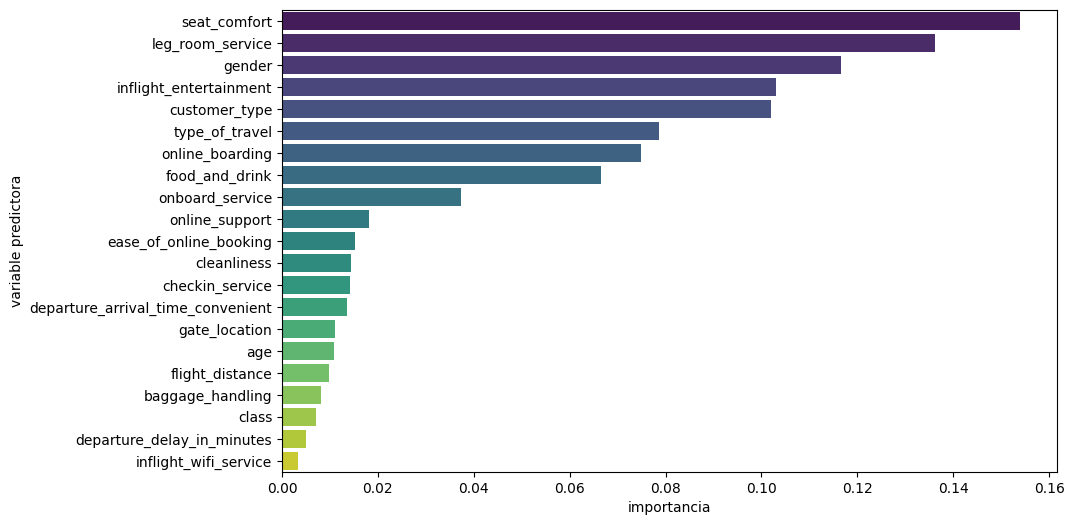

In [29]:
# ploteamos los resultados para verlo de una forma más amigable. 
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "variable predictora", data = importancia_predictoras, palette="viridis")
plt.show();

### 2. Modelo con los datos balanceados

In [30]:
# abrimos el dataset
df_bal = pd.read_pickle("datos/invistico_airline_encod_balance.pkl")
df_bal.sample(5)

,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,...,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes,satisfaction
111034,1,1,1,1,2,1,3,2,3,1,...,3,2,3,3,5,1,-0.208333,-0.209283,0.666667,1
123194,1,1,1,2,0,2,4,3,1,1,...,2,2,3,2,4,1,0.291667,-0.761181,0.000000,1
85007,1,1,1,2,1,1,4,2,1,4,...,4,1,4,2,5,2,-0.208333,0.487764,0.000000,0
112029,1,1,1,1,3,2,4,5,1,4,...,1,2,3,3,3,2,0.166667,0.960338,0.000000,1
1805,1,1,0,2,2,2,2,5,2,2,...,2,4,4,2,4,3,-0.166667,0.133333,1.916667,0


In [31]:
# separamos los datos en variable respuesta (y) y predictoras (X)
X_bal = df_bal.drop("satisfaction", axis = 1)
y_bal = df_bal["satisfaction"]

In [32]:
# separamos en train y test
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = 5)

In [33]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol_bal = DecisionTreeClassifier(random_state =1)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(random_state=1)

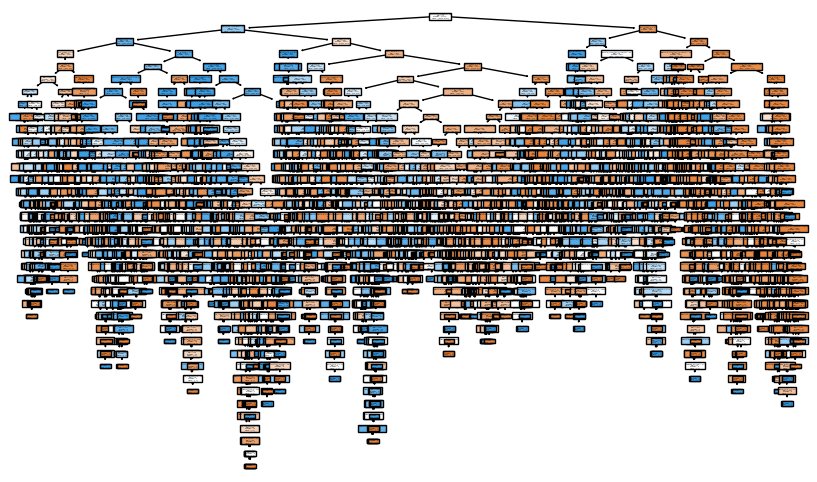

In [ ]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol_bal, feature_names = x_train_bal.columns, filled = True)
# plt.show();

In [34]:
# max features, profudidad máxima para el modelo 
max_features_bal = np.sqrt(len(x_train_bal.columns))
max_features_bal

4.58257569495584

In [35]:
# max depth
print(arbol_bal.tree_.max_depth)

32


In [36]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_bal = arbol_bal.predict(x_test_bal)
y_pred_train_bal = arbol_bal.predict(x_train_bal)

In [37]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
dt_results_bal = spf.metricas_rlog(y_test_bal, y_pred_test_bal, y_train_bal, y_pred_train_bal, "Decission Tree Balanceado I")
dt_results_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.947468,0.946869,0.946937,0.946903,0.894925,test,Decission Tree Balanceado I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Balanceado I


Tenemos un caso claro de overfitting ya que todas las métricas del train son 1 y la diferencia entre el kappa de train y el de test es mayor que 0,1 (0,11).

In [38]:
param_bal = {"max_depth": [2, 4, 6, 10, 12, 14], # teniendo en cuenta que teníamos un overfitting muy claro tendremos que reducir la profundidad del modelo bastante
        "max_features": [2, 3, 4, 5],# Ponemos como límite el 5 ya que es el resultado de la raiz cuadrada era 4,58. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10, 50, 100]} 

In [39]:
# iniciamos el modelo con GridSearch
gs_bal = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 5), # tipo de modelo que queremos hacer
            param_grid= param_bal, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [40]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_bal.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [41]:
# obtenemos el mejor modelo
mejor_modelo_bal = gs_bal.best_estimator_
mejor_modelo_bal

DecisionTreeClassifier(max_depth=14, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=5)

In [ ]:
# # veamos ahora que pinta tiene nuestro árbol
# fig = plt.figure(figsize=(40, 20))
# tree.plot_tree(mejor_modelo_bal, feature_names=x_train_bal.columns, filled=True)
# plt.show();

In [42]:
# utilizando el mejor modelo realizamos las predicciones
y_pred_test2_bal = mejor_modelo_bal.predict(x_test_bal)
y_pred_train2_bal = mejor_modelo_bal.predict(x_train_bal)

In [43]:
#obtenemos las métricas
dt_results2_bal = spf.metricas_rlog(y_test_bal, y_pred_test2_bal, y_train_bal,  y_pred_train2_bal, "Decission tree Balanceado II")
dt_results2_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
1,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II


Las métricas de este modelo son muy buenas, siendo Kappa de 0,85, bastante superior a los 0,70 mínimos para considerar el modelo aceptable.

In [44]:
# añadimos los resultados de los decision trees
df_DT_LR_results_final = pd.concat([df_DT_LR_results, dt_results_bal, dt_results2_bal], axis = 0).reset_index(drop=True)
df_DT_LR_results_final

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II
4,0.947468,0.946869,0.946937,0.946903,0.894925,test,Decission Tree Balanceado I
5,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Balanceado I
6,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
7,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II


De los modelos que tenemos ya hemos descartado el modelo de `Decission Tree Balanceado I` (el tercero) que tiene un overfitting muy claro, así que lo podemos eliminar.  

In [45]:
# eliminamos los resultados descartados
df_DT_LR_results_final.drop([4,5], axis = 0, inplace = True)
df_DT_LR_results_final

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II
6,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
7,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II


Mantenemos el de `Regresión Logística Balanceado` por tener presente el mejor model de cada algoritmo a modo de curiosidad pero a nivel de seleccionar el mejor modelo este queda claramente descartado porque los dos de tipo Decission Tree son claramente mejores. La diferencia entre los dos de Decission Tree que mantenemos es mínima así que mantenemos ambos hasta ver los de tipo Random Forest.

In [46]:
# usamos colores para facilitar la comparación 
df_DT_LR_results_final.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II
6,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
7,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II


In [47]:
# guardar este dataframe en un csv para comparar con los siguientes modelos
df_DT_LR_results_final.to_csv("datos/resultados_satisfaction_DT.csv")

In [49]:
# crearnos un dataframe con la importancia de las predictoras
importancia_predictoras_bal = pd.DataFrame({'variable predictora': x_train_bal.columns,
                                            'importancia': mejor_modelo_bal.feature_importances_})
# ordenamos de mayor a menor los resultados
importancia_predictoras_bal.sort_values(by=["importancia"], ascending=False, inplace = True)
# printeamos los resultados
print("Importancia de las variables predictoras en el modelo")
print("-------------------------------------------")
importancia_predictoras_bal


Importancia de las variables predictoras en el modelo
-------------------------------------------


,variable predictora,importancia
4,seat_comfort,0.170032
9,inflight_entertainment,0.157914
10,online_support,0.085264
12,onboard_service,0.083355
11,ease_of_online_booking,0.078304
1,customer_type,0.065932
13,leg_room_service,0.055489
16,cleanliness,0.045968
3,class,0.043535
6,food_and_drink,0.038604


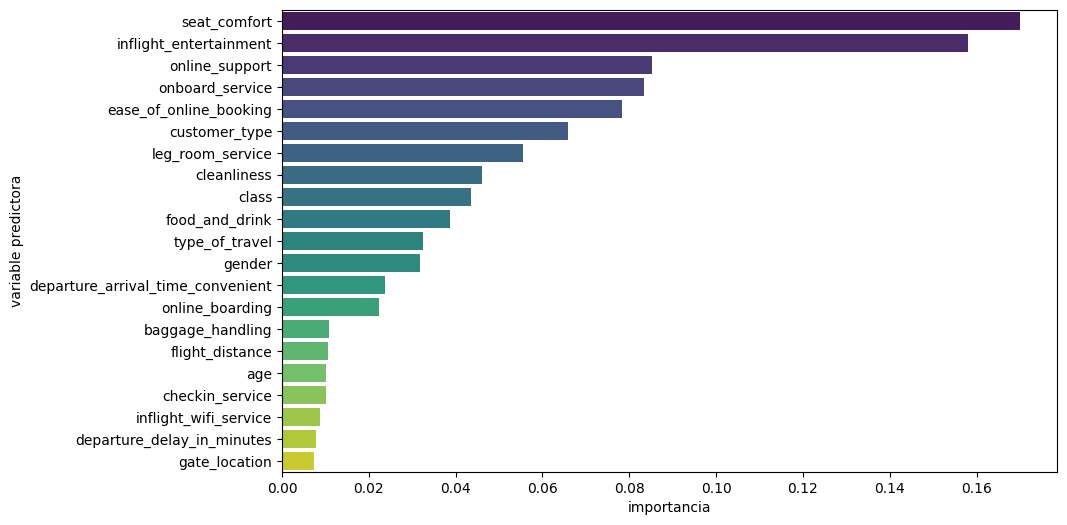

In [51]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "variable predictora", data = importancia_predictoras_bal, palette="viridis");
plt.show()